# Linear Regression

**Author:** Jhosimar George Arias Figueroa

## Introdution

This notebook is intended to be a guide for a better understanding of the implementation for Linear Regression. We will implement it from scratch with numpy and with the sklearn package.

## Data Generation

First let's import some packages that will be used throughout this notebook

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import pinv

We will generate random data the will be used to test our implementation

In [0]:
def generate_dataset_simple(beta, n, std_dev):
  
  # Generate x as an array of 'n' samples which can take a value between 0 and 100
  x = np.random.rand(n) * 100
  
  # Generate the random error of n samples, with a random value from a normal distribution, with a standard
  # deviation provided in the function argument
  e = np.random.randn(n) * std_dev
  
  # Calculate `y` according to the equation discussed
  y = x * beta + e
  
  return x, y

In [0]:
x_train, y_train = generate_dataset_simple(10, 50, 100)
x_test, y_test = generate_dataset_simple(10, 50, 100)

Let's plot the train and test generated datasets

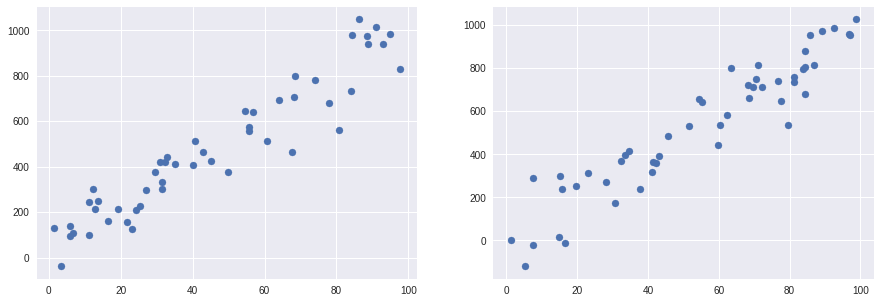

In [4]:
plt.subplots(figsize =(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train)
plt.subplot(1, 2, 2)
plt.scatter(x_test, y_test)
plt.show()

## Model Implementation

We will implement Linear Regression first with **numpy** and then with **sklearn**



### Numpy

In [0]:
class LinearRegression:
  
  def __init__(self, **params):
    """ Initialize global parameters of the class
        
    Parameters:
    ------------
        iterations: int, optional
             Number of iterations of gradient descent to be performed
             
        learning_rate: float, optional     
             Learning rate used in gradient descent
        
        verbose: int, optional
             Print information during training at each specified iteration
        
        save_weights: bool
             Whether to save the weights during training
        
        method: string, values = 'normal_equation' | 'gradient_descent'
             Indicates method for which linear regression will be performed
        
    """ 
    
    self.iterations = params.get('iterations', 10)
    self.alpha = params.get('learning_rate', 1e-3)
    self.print_it = params.get('verbose', 10)
    self.save_weights = params.get('save_weights', False)
    self.method = params.get('method', 'normal_equation')
    
    
  def loss(self, X, y_pred, y_true):
    """ Compute value of the cost function and its gradient
        
    Parameters:
    ------------
        X : numpy array, shape = [n_samples, n_features]
        y_pred : numpy array, shape = [n_samples, 1]
        y_true : numpy array, shape = [n_samples, 1]
        
    Returns:
    ---------
        cost: value of the cost function given the true and predicted values
        grad: value of the cost function's gradient
        
    """
    n = y_pred.shape[0]
    # calculation of residual
    residual = (y_pred - y_true)
    # calculation of cost function
    cost = np.sum(residual**2) / (2. * n)
    # calculation of gradient
    grad = X.T.dot(residual) / (1. * n)
    return cost, grad
  
  
  def gradient_descent(self, X, y):
    """ Compute values of parameters W
        
    Parameters:
    ------------
        X : numpy array, shape = [n_samples, n_features]
        y : numpy array, shape = [n_samples, 1]
        
    Returns:
    ---------
        W: parameters after training process
        cost_history: history of cost function
        W_history: history of parameters W
        
    """
    n, d = X.shape[0], X.shape[1]
    
    # initialize weights with 0's
    W = np.zeros((d,1))
    total_cost = 0.0
    cost_history = []
    W_history = []
    
    # improve weights according to the given number of iterations
    for it in range(self.iterations):
      
      # current prediction given W
      y_pred = X.dot(W)
      
      # calculate the cost function and its gradient
      cost, grad = self.loss(X, y_pred, y)
      
      # update W given gradient and learning rate
      W = W - self.alpha * grad
      cost_history.append(cost)
      
      # keep weight history
      if self.save_weights == True:
        W_history.append(W) 
        
    return W, cost_history, W_history
  
  
  def normal_equation(self, X, y):
    """ Compute values of parameters W
        
    Parameters:
    ------------
        X : numpy array, shape = [n_samples, n_features]
        y : numpy array, shape = [n_samples, 1]
        
    Returns:
    ---------
        W: parameters using normal equations
        
    """ 
    return pinv(X.T.dot(X)).dot(X.T).dot(y)
  
  def lstsq(self, X, y):
    """ Compute values of parameters W
        
    Parameters:
    ------------
        X : numpy array, shape = [n_samples, n_features]
        y : numpy array, shape = [n_samples, 1]
        
    Returns:
    ---------
        W: parameters using in-built library
        
    """ 
    return np.linalg.lstsq(X, y)
  
  
  def train(self, X, y):
    """ Compute value of parametes W according to training data set and method
        
    Parameters:
    ------------
        X : numpy array, shape = [n_samples, n_features]
        y : numpy array, shape = [n_samples, 1]
        
    Returns:
    ---------
        self: object
        
    """ 
    # if only one dimension, reshape data
    if len(X.shape) == 1:
      X = X.reshape(-1,1)
    if len(y.shape) == 1:
      y = y.reshape(-1,1)
    
    # add a column of ones, representing the bias
    ones = np.ones((X.shape[0], 1))
    X = np.hstack( (X, ones) )
    
    # methods to solve the problem
    if self.method == 'normal_equation':
      self.W = self.normal_equation(X,y)
      
    elif self.method == 'gradient_descent':
      self.W, self.cost_history, self.W_history = self.gradient_descent(X,y)
      
      # print the cost
      for i in range(self.iterations):
        if i % self.print_it == 0:
          print( "it: %d, cost: %.3lf" % (i, self.cost_history[i]) )
    
    elif self.method == 'in-built':
      self.W = self.lstsq(X, y)
      
    else:
      raise "invalid method: you can choose normal_equations or gradient_descent"
  
  
    
  def predict(self, X):
    """ Predict values given new data
        
    Parameters:
    ------------
        X : numpy array, shape = [n_samples, n_features]
        
    Returns:
    ---------
        Predicted values by using the learng parameters W
        
    """
    # if only one dimension, reshape data
    if len(X.shape) == 1:
      X = X.reshape(-1,1)

    # add a column of ones, representing the bias
    ones = np.ones((X.shape[0], 1))
    X = np.hstack( (X, ones) )
    return X.dot(self.W)

Let's create a model using our implementation and test with the two implemented methods: Normal Equations and Gradient Descent.

#### Normal Equations

Normal equations does not require additional parameters

In [0]:
model = LinearRegression()

Let's fit the model with our training data

In [0]:
model.train(x_train, y_train)

Let's predict values for our testing data

In [0]:
y_pred = model.predict(x_test)

To evaluate our prediction, we will use the mean square error

In [9]:
def mse(y_pred, y_true):
  y_pred = y_pred.flatten()
  y_true = y_true.flatten()
  n = y_pred.shape[0]
  return np.sum((y_pred - y_test)**2)/(1.0 * n)

mse(y_pred, y_test)

10528.223876643682

Let's plot the line obtained by our model

In [0]:
def plot_fit(x_test, y_test, y_pred):
  plt.scatter(x_test, y_test)
  plt.plot(x_test, y_pred, color='green')
  plt.show()

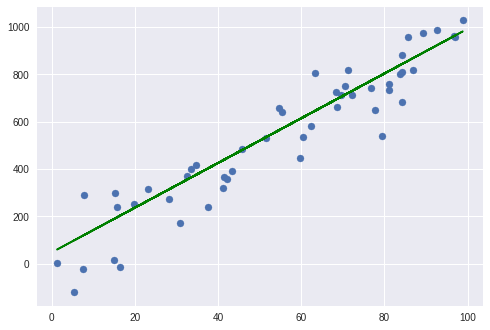

In [11]:
plot_fit(x_test, y_test, y_pred)

#### Gradient Descent

We require to set parameters for the Gradient Descent model

In [0]:
model = LinearRegression(iterations = 20, learning_rate=1e-4, verbose=5, method='gradient_descent')

Let's fit the model with our training data

In [13]:
model.train(x_train, y_train)

it: 0, cost: 156104.774
it: 5, cost: 9255.240
it: 10, cost: 4641.049
it: 15, cost: 4495.976


Let's predict values for our testing data

In [0]:
y_pred = model.predict(x_test)

Model evaluation

In [15]:
mse(y_pred, y_test)

9986.662724722193

Let's plot the line obtained by our model

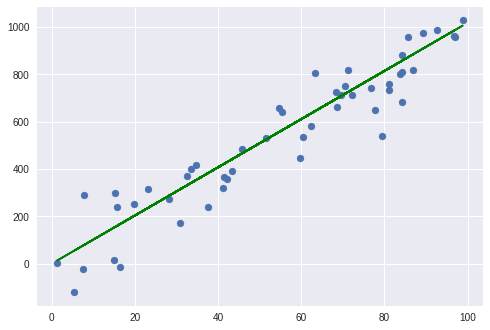

In [16]:
plot_fit(x_test, y_test, y_pred)

### Scikit-learn library

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [0]:
from sklearn import linear_model

In [0]:
model = linear_model.LinearRegression()

Library implementation require the data to be in 2D

In [0]:
X_train = x_train.reshape(-1,1)
Y_train = y_train.reshape(-1,1)

X_test = x_test.reshape(-1,1)
Y_test = y_test.reshape(-1,1)

In [20]:
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
Y_pred = model.predict(X_test)

In [22]:
mse(Y_pred, Y_test)

10528.223876643684

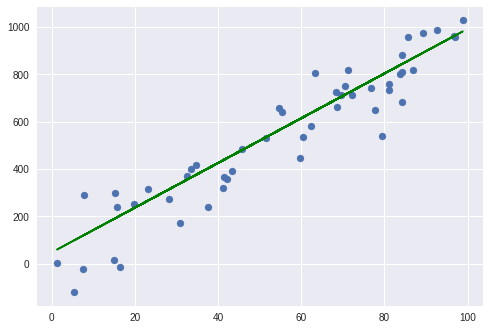

In [23]:
plot_fit(X_test, Y_test, Y_pred)

## Polynomial Regression

For the polynomial case, we will generate non-linear data

In [0]:
def generate_poly_data():
  data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis] 
  data_y = np.sin(data_x) + 0.1*np.power(data_x,2) + 0.5*np.random.randn(100,1)
  data_x /= np.max(data_x)
  return data_x, data_y

In [0]:
x_train, y_train = generate_poly_data()
x_test, y_test = generate_poly_data()

Plot the train and test generated datasets

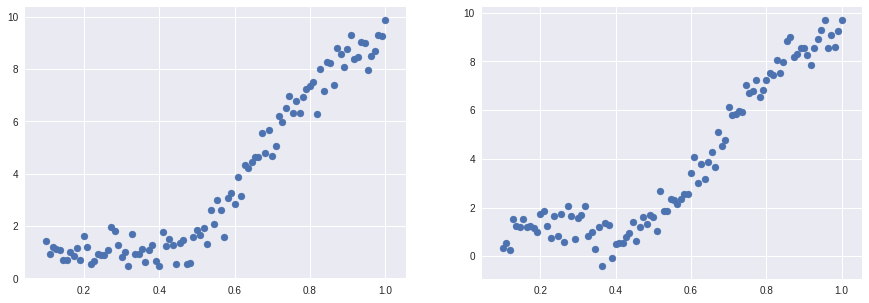

In [26]:
plt.subplots(figsize =(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(x_train, y_train)
plt.subplot(1, 2, 2)
plt.scatter(x_test, y_test)
plt.show()

### Model

Model with **numpy**

In [0]:
model = LinearRegression()
model.train(x_train, y_train)
y_pred = model.predict(x_test)

In [28]:
mse(y_pred, y_test)

1781.8836799826925

Let's plot the prediction of a simple linear model

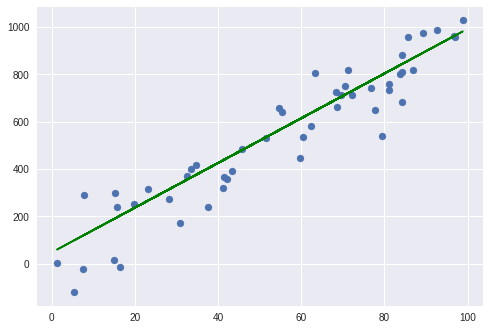

In [29]:
plot_fit(X_test, Y_test, Y_pred)

Model with **sklearn**

In [0]:
model = linear_model.LinearRegression()

X_train = x_train.reshape(-1,1)
Y_train = y_train.reshape(-1,1)
X_test = x_test.reshape(-1,1)
Y_test = y_test.reshape(-1,1)

model.fit(X_train, Y_train)

Y_pred = model.predict(X_test)

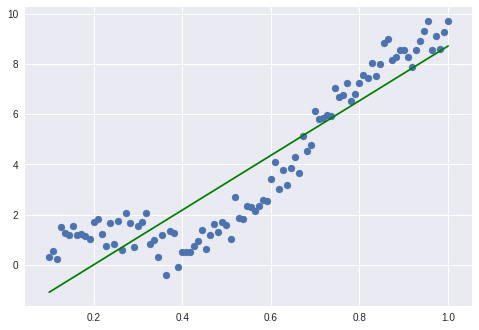

In [31]:
plot_fit(X_test, Y_test, Y_pred)

#### Adding polynomial features

We can generate polynomial features by using the the package preprocessing.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [0]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(5)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [33]:
print 'Original Shape: ', X_train.shape
print 'New Shape: ', X_train_poly.shape

Original Shape:  (100, 1)
New Shape:  (100, 6)


Let's use our **numpy** implementation

In [0]:
model = LinearRegression()
model.train(X_train_poly, Y_train)
Y_pred_poly = model.predict(X_test_poly)

In [35]:
mse(Y_pred_poly, Y_test)

1889.977277484206

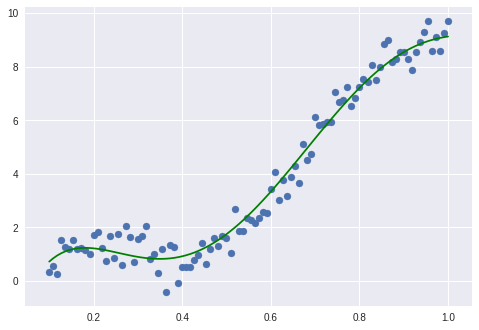

In [36]:
plot_fit(X_test, Y_test, Y_pred_poly)

Let's use the **sklearn** library

In [0]:
model = linear_model.LinearRegression()

model.fit(X_train_poly, Y_train)

Y_pred_poly = model.predict(X_test_poly)

In [38]:
mse(Y_pred_poly, Y_test)

1889.9772779286618

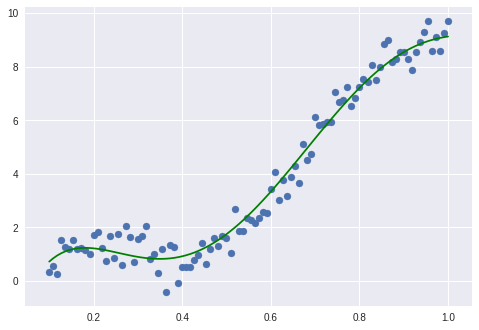

In [39]:
plot_fit(X_test, Y_test, Y_pred_poly)

Why is it useful to use a library instead own implementation?

In [0]:
poly = PolynomialFeatures(20)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

Results using **numpy**

In [0]:
model = LinearRegression()
model.train(X_train_poly, Y_train)
Y_pred_poly = model.predict(X_test_poly)

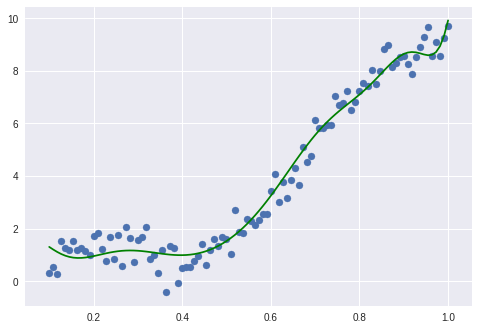

In [42]:
plot_fit(X_test, Y_test, Y_pred_poly)

Results using **sklearn**

In [0]:
model = linear_model.LinearRegression()
model.fit(X_train_poly, Y_train)
Y_pred_poly = model.predict(X_test_poly)

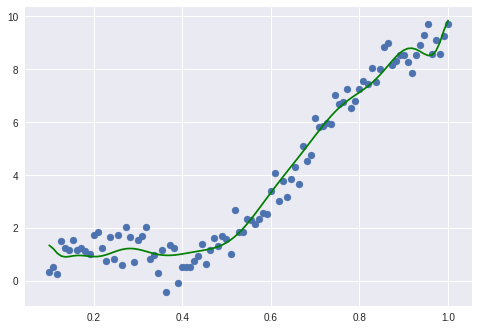

In [44]:
plot_fit(X_test, Y_test, Y_pred_poly)

## Ridge Regression

We will implement Rdige Regression first with **numpy** and then with **sklearn**. It will be a simple modification to the previously implemented class LinearRegression

### Numpy

In [0]:
class RidgeRegression:
  
  def __init__(self, **params):
    """ Initialize global parameters of the class
        
    Parameters:
    ------------
        iterations: int, optional
             Number of iterations of gradient descent to be performed
             
        learning_rate: float, optional     
             Learning rate used in gradient descent
        
        verbose: int, optional
             Print information during training at each specified iteration
        
        save_weights: bool
             Whether to save the weights during training
        
        method: string, values = 'normal_equation' | 'gradient_descent'
             Indicates method for which linear regression will be performed
        
    """ 
    
    self.iterations = params.get('iterations', 10)
    self.alpha = params.get('learning_rate', 1e-3)
    self.print_it = params.get('verbose', 10)
    self.save_weights = params.get('save_weights', False)
    self.method = params.get('method', 'normal_equation')
    self.alpha = params.get('alpha', 1.0)
    
    
  def loss(self, X, y_pred, y_true, W):
    """ Compute value of the cost function and its gradient
        
    Parameters:
    ------------
        X : numpy array, shape = [n_samples, n_features]
        y_pred : numpy array, shape = [n_samples, 1]
        y_true : numpy array, shape = [n_samples, 1]
        
    Returns:
    ---------
        cost: value of the cost function given the true and predicted values
        grad: value of the cost function's gradient
        
    """
    n = y_pred.shape[0]
    # calculation of residual
    residual = (y_pred - y_true)
    # calculation of cost function
    cost = np.sum(residual**2) / (2. * n) + (self.alpha / 2.) * np.sum(W * W)
    # calculation of gradient
    grad = X.T.dot(residual) / (1. * n) + self.alpha * W
    return cost, grad
  
  
  def gradient_descent(self, X, y):
    """ Compute values of parameters W
        
    Parameters:
    ------------
        X : numpy array, shape = [n_samples, n_features]
        y : numpy array, shape = [n_samples, 1]
        
    Returns:
    ---------
        W: parameters after training process
        cost_history: history of cost function
        W_history: history of parameters W
        
    """
    n, d = X.shape[0], X.shape[1]
    
    # initialize weights with 0's
    W = np.zeros((d,1))
    total_cost = 0.0
    cost_history = []
    W_history = []
    
    # improve weights according to the given number of iterations
    for it in range(self.iterations):
      
      # current prediction given W
      y_pred = X.dot(W)
      
      # calculate the cost function and its gradient
      cost, grad = self.loss(X, y_pred, y, W)
      
      # update W given gradient and learning rate
      W = W - self.alpha * grad
      cost_history.append(cost)
      
      # keep weight history
      if self.save_weights == True:
        W_history.append(W) 
        
    return W, cost_history, W_history
  
  
  def normal_equation(self, X, y):
    """ Compute values of parameters W
        
    Parameters:
    ------------
        X : numpy array, shape = [n_samples, n_features]
        y : numpy array, shape = [n_samples, 1]
        
    Returns:
    ---------
        W: parameters using normal equations
        
    """ 
    d = X.shape[1]
    return pinv(X.T.dot(X) + self.alpha * np.identity(d)).dot(X.T).dot(y)
  
  
  def train(self, X, y):
    """ Compute value of parametes W according to training data set and method
        
    Parameters:
    ------------
        X : numpy array, shape = [n_samples, n_features]
        y : numpy array, shape = [n_samples, 1]
        
    Returns:
    ---------
        self: object
        
    """ 
    # if only one dimension, reshape data
    if len(X.shape) == 1:
      X = X.reshape(-1,1)
    if len(y.shape) == 1:
      y = y.reshape(-1,1)
    
    # add a column of ones, representing the bias
    ones = np.ones((X.shape[0], 1))
    X = np.hstack( (X, ones) )
    
    # methods to solve the problem
    if self.method == 'normal_equation':
      self.W = self.normal_equation(X,y)
      
    elif self.method == 'gradient_descent':
      self.W, self.cost_history, self.W_history = self.gradient_descent(X,y)
      
      # print the cost
      for i in range(self.iterations):
        if i % self.print_it == 0:
          print( "it: %d, cost: %.3lf" % (i, self.cost_history[i]) )
    
    elif self.method == 'in-built':
      self.W = self.lstsq(X, y)
      
    else:
      raise "invalid method: you can choose normal_equations or gradient_descent"
  
  
    
  def predict(self, X):
    """ Predict values given new data
        
    Parameters:
    ------------
        X : numpy array, shape = [n_samples, n_features]
        
    Returns:
    ---------
        Predicted values by using the learng parameters W
        
    """
    # if only one dimension, reshape data
    if len(X.shape) == 1:
      X = X.reshape(-1,1)

    # add a column of ones, representing the bias
    ones = np.ones((X.shape[0], 1))
    X = np.hstack( (X, ones) )
    return X.dot(self.W)

#### Normal Equations

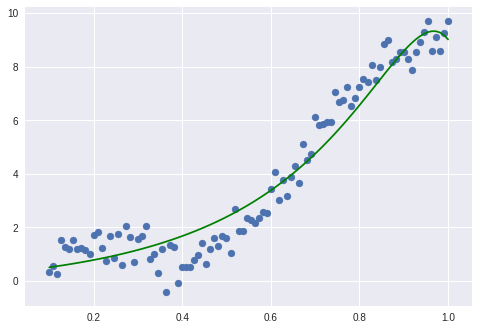

In [46]:
model = RidgeRegression(alpha=1.0)
model.train(X_train_poly, Y_train)
Y_pred_poly = model.predict(X_test_poly)
plot_fit(X_test, Y_test, Y_pred_poly)

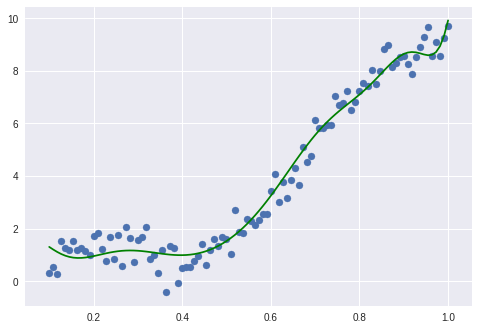

In [47]:
model = RidgeRegression(alpha=0)
model.train(X_train_poly, Y_train)
Y_pred_poly = model.predict(X_test_poly)
plot_fit(X_test, Y_test, Y_pred_poly)

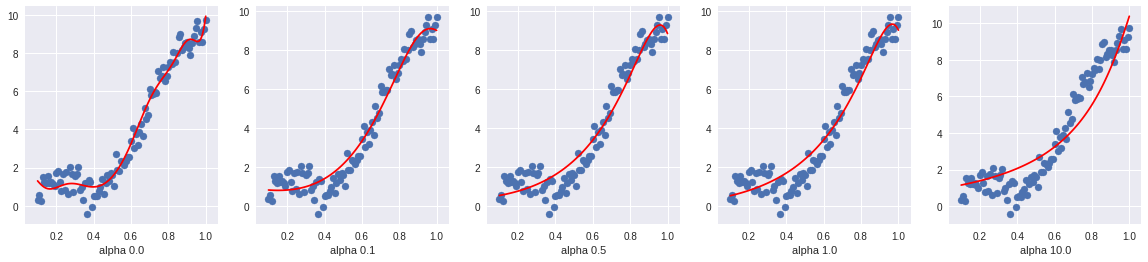

In [48]:
alpha_values = [0, 0.1, 0.5, 1.0, 10]

plt.subplots(figsize =(20, 4))
for i in range(len(alpha_values)):
  alpha = alpha_values[i]
  model = RidgeRegression(alpha=alpha)
  model.train(X_train_poly, Y_train)
  Y_pred_poly = model.predict(X_test_poly)
  plt.subplot(1, len(alpha_values), i + 1)
  plt.scatter(X_test, Y_test)
  plt.plot(X_test, Y_pred_poly, color='red')
  plt.xlabel('alpha %.1lf' % alpha)

#### Gradient Descent

it: 0, cost: 11.991
it: 500, cost: 0.723
it: 1000, cost: 0.518
it: 1500, cost: 0.438


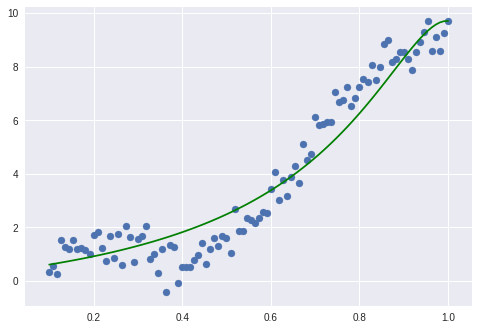

In [49]:
model = RidgeRegression(alpha=0.01, iterations = 2000, learning_rate=1e-2,
                         verbose=500, method='gradient_descent')
model.train(X_train_poly, Y_train)
Y_pred_poly = model.predict(X_test_poly)
plot_fit(X_test, Y_test, Y_pred_poly)

### Scikit-learn library


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

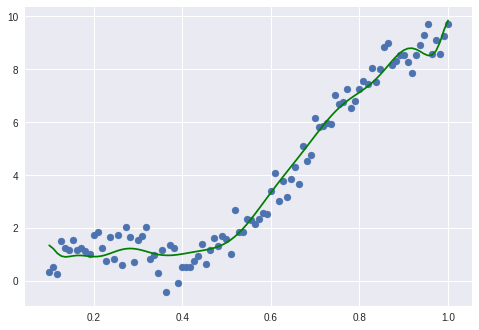

In [50]:
model = linear_model.Ridge(alpha=0)
model.fit(X_train_poly, Y_train)
Y_pred_poly = model.predict(X_test_poly)
plot_fit(X_test, Y_test, Y_pred_poly)

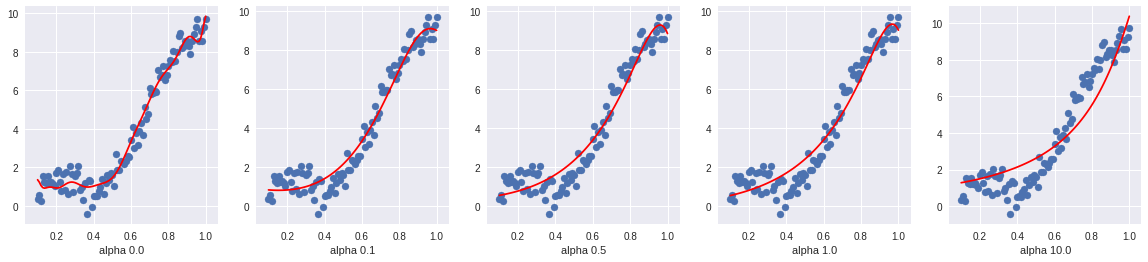

In [51]:
alpha_values = [0, 0.1, 0.5, 1.0, 10]

plt.subplots(figsize =(20, 4))
for i in range(len(alpha_values)):
  alpha = alpha_values[i]
  model = linear_model.Ridge(alpha=alpha)
  model.fit(X_train_poly, Y_train)
  Y_pred_poly = model.predict(X_test_poly)
  plt.subplot(1, len(alpha_values), i + 1)
  plt.scatter(X_test, Y_test)
  plt.plot(X_test, Y_pred_poly, color='red')
  plt.xlabel('alpha %.1lf' % alpha)